# Setting

In [1]:
from pf_utils import (BacktestManager, DataManager, FinancialRatios, 
                      StaticPortfolio, MomentumPortfolio, AssetEvaluator, METRICS)
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
METRICS2 = [
    'total_return', 'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'
path_tran = 'transaction'

# Universe

In [3]:
WidgetUniverse

In [4]:
# universe and file
uv_k200 = ['kospi200', 'kospi200_prices.csv']
uv_krx = ['krx', 'krx_prices.csv']
uv_etf  = ['etf', 'etfs_all.csv']
uv_irp  = ['fund', 'funds_irp.csv']
uv_hana = ['fund', 'funds_kebhana.csv']

## KOSPI200

In [6]:
k200 = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_k200))
)
k200.upload()

201 assets from 2021-01-04 to 2024-10-18 uploaded.
df_prices updated


In [7]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=k200.df_prices.columns
)
k200.download(**kw) if WidgetUniverse.values(0) else None

201 assets from 2021-01-04 to 2024-10-23 downloaded.
kospi200_prices_241023.csv saved
df_prices updated
Execution time of download: 28.89 secs


In [8]:
df_k200 = k200.df_prices
assetnames_k200 = k200.get_names()

## KRX

In [47]:
krx = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_krx))
)
krx.upload()

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices updated


In [48]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

... done
ERROR: 'NoneType' object has no attribute 'index'
Execution time of download: 0.64 secs


In [11]:
df_krx = krx.df_prices
assetnames_krx = krx.get_names()

ERROR from get_names: '164060'


### KOSPI

In [12]:
from pf_utils import KRXDownloader
market = 'KOSPI'
krxd = KRXDownloader(None)
krxd.get_tickers(market)
assets_kospi = krxd.tickers

In [13]:
df_kospi = df_krx[df_krx.columns.intersection(assets_kospi)]

## ETF

In [14]:
etf = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_etf)))
etf.upload()

902 assets from 2021-01-04 to 2024-10-18 uploaded.
df_prices updated


In [15]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=etf.df_prices.columns
)
etf.download(**kw) if WidgetUniverse.values(0) else None

909 assets from 2021-01-04 to 2024-10-23 downloaded.
etfs_all_241023.csv saved
df_prices updated
Execution time of download: 187.57 secs


In [16]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etf = etf.df_prices[choice]
assetnames_etf = etf.get_names(tickers=choice)
assetnames_etf

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

## IRP - FUNDS
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8370&fundcode=8380
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537400&childFundGb=2&childFundCd=53740P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537410&childFundGb=2&childFundCd=53741P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [16]:
irp = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_irp))
)
irp.upload()
df = irp.check_days_in_year(252)

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices updated


In [17]:
irp.convert_to_daily(True)

REMINDER: data converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [18]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()

import pandas as pd
df_an = pd.Series(assetnames_irp).to_frame('name')

In [19]:
irp.get_date_range().sort_values('end date').join(df_an)

,start date,end date,name
K55223BT1450,2017-07-31,2024-07-31,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55105BS5067,2017-07-31,2024-07-31,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe
K55210BU2435,2017-08-31,2024-07-31,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
KR5223AE3357,2017-08-31,2024-07-31,kb퇴직연금배당증권자투자신탁(주식)C-E
K55365BT3694,2017-08-31,2024-07-31,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55207BU0715,2017-08-31,2024-07-31,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe
K55203C53681,2018-04-30,2024-07-31,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55213C51890,2018-05-31,2024-07-31,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55234CJ0997,2019-01-31,2024-07-31,IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re
K55301BU5479,2017-08-14,2024-08-25,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e


In [20]:
irp.performance('sharpe', 'year').join(df_an)

,daily_sharpe,monthly_sharpe,yearly_sharpe,name
K55301BU6139,0.953281,0.901074,0.59158,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
K55301BU5479,0.928838,0.890844,0.589447,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
K55365BT3694,0.640849,0.640538,0.573647,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55213C51890,0.749963,0.754216,0.542374,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55223BT1450,0.641399,0.641106,0.484719,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55210BU2435,0.68767,0.689062,0.478562,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
K55203C53681,0.542176,0.539386,0.475771,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55206C96311,0.730614,0.628118,0.452722,키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55206C95800,0.778547,0.649921,0.439991,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55207BU0715,0.468617,0.464831,0.417496,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe


## HANA - FUNDS
- https://dis.kofia.or.kr

In [21]:
hana = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_hana))
)
hana.upload()
hana.get_date_range()

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-07-31
KR5370AP9956,2014-04-30,2024-07-31
KR5236AS4826,2014-05-30,2024-07-31
K55306CV9946,2019-10-31,2024-07-31


In [22]:
hana.check_days_in_year(12)

KR5101888398    12.0
KR5236AS4826    12.0
KR5370AP9956    12.0
K55306CV9946    12.0
dtype: float64

In [23]:
hana.convert_to_daily(True)

KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: data converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [24]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
assetnames_hana

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

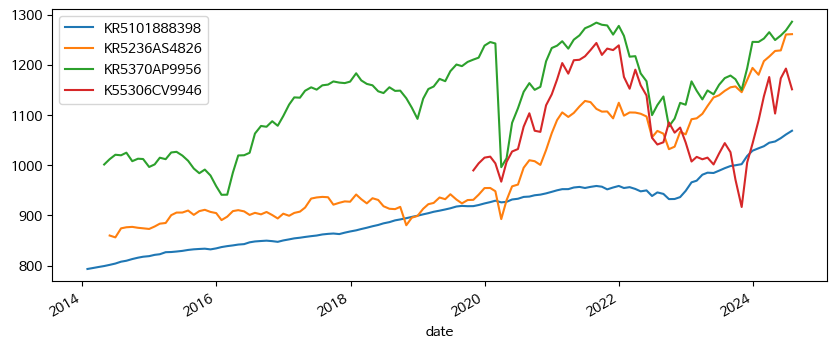

In [25]:
_ = df_hana.loc['2014':].plot(figsize=(10,4))

## LIQ

In [5]:
# portfolio of past trading system to liquidate soon
tickers_liq = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [6]:
liq = DataManager(
    path = path_data,
    universe='krx',
    file='krx_liq_prices.csv'
)
liq.upload()

24 assets from 2021-01-04 to 2024-10-18 uploaded.
df_prices updated


In [7]:
kw = dict(
    n_years=3, 
    tickers=tickers_liq,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

100%|███████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 16.72it/s]

1.4 secs elapsed, 0.0 secs paused (0.0%)
... done
24 assets from 2021-01-04 to 2024-10-23 downloaded.
krx_liq_prices_241023.csv saved
df_prices updated
Execution time of download: 1.46 secs


In [8]:
df_liq = liq.df_prices
assetnames_liq = liq.get_names()

## Additional Data

### Financial Ratio

In [17]:
WidgetUniverse

In [18]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-10-18 loaded


In [19]:
start = '2023-01-01'
tickers = df_k200.columns.to_list()
kw = dict(
    freq = 'd',
    close_today = WidgetUniverse.values(1)
)
fr.download(tickers, start, **kw) if WidgetUniverse.values(0) else None

100%|█████████████████████████████████████████████████████████████| 201/201 [07:23<00:00,  2.21s/it]

7.4 mins elapsed, 16.0 secs paused (3.6%)
Financial ratios of 201 stocks from 2023-01-02 to 2024-10-23 downloaded
kospi200_ratios_241023.csv saved


In [20]:
df_p = fr.util_reshape(df_k200)

fratios_dict = dict()
for r in ['PER', 'PBR']:
    df = fr.interpolate(df_p, r)
    fratios_dict[r] = fr.util_reshape(df, stack=False)

# Backtest

## KOSPI200

In [21]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246,
    asset_names = assetnames_k200
)
bm = BacktestManager(df_k200, **kwargs_bm)

16 assets removed for shorter periods (8.0%)
185 assets from 2021-01-04 to 2024-10-23 uploaded.
running self.util_check_days_in_year to check days in a year


In [22]:
lags = dict(lookback=12, lag=5)

In [23]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [36]:
select = 'Momentum'
kwargs_build = dict(
    name=f'K200:{select}', select =select,
    freq='M', weigh = 'ERC',
    n_assets=5, **lags
)
bm.build(**kwargs_build)

In [37]:
select = 'K-ratio'
kwargs_build.update(dict(
    name=f'K200:{select}', select =select,
))
bm.build(**kwargs_build)

In [38]:
select = 'Momentum'
n_assets = 10
kwargs_build = dict(
    name=f'K200:{select}_{n_assets}', select =select,
    freq='M', weigh = 'ERC',
    n_assets=n_assets, **lags
)
bm.build(**kwargs_build)

Backtesting 4 strategies: KODEX200, K200:Momentum, K200:K-ratio, K200:Momentum_10


100%|█████████████████████████████████████████████████████████████████| 4/4 [01:08<00:00, 17.01s/it]

Returning stats


,K200:Momentum,K200:K-ratio,K200:Momentum_10,KODEX200
start,2021-01-03,2021-01-03,2021-01-03,2021-01-03
end,2024-10-18,2024-10-18,2024-10-18,2024-10-18
total_return,5.433096,1.730929,2.219475,-0.05401
cagr,0.634366,0.303606,0.361473,-0.014546
calmar,2.082341,1.434511,1.179317,-0.052294
max_drawdown,-0.304641,-0.211644,-0.30651,-0.278165
avg_drawdown,-0.064854,-0.032253,-0.051486,-0.078234
avg_drawdown_days,18.844444,18.673913,27.40625,166.5
daily_vol,0.397759,0.233239,0.299329,0.157817
daily_sharpe,1.462442,1.280387,1.205438,-0.015753


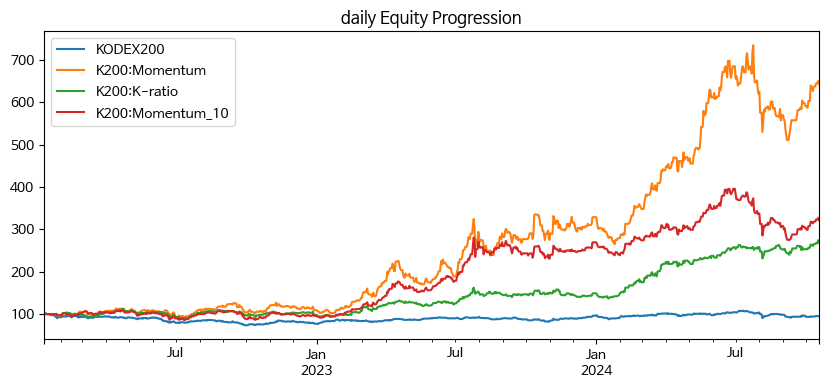

In [39]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [21]:
df_pf = bm.get_historical()
df_pf = df_pf[['KODEX200','K200:Momentum']]

## KRX

### KOSPI + KOSDAQ

In [53]:
n_test = 250
df_train = df_krx.iloc[:-n_test]
df_test = df_krx.iloc[-n_test-250:]

kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = None, 
    days_in_year = 246,
    asset_names = assetnames_krx
)

In [61]:
bm = BacktestManager(df_train, **kwargs_bm)

2712 assets from 2019-01-02 to 2023-09-22 uploaded.
running self.util_check_days_in_year to check days in a year


In [62]:
lags = dict(lookback=12, lag=20)

In [63]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [20]:
from itertools import product

params = dict(
    p_ast = [5,10,20],
    p_lback = [6,12,18],
    p_lag = [5,10,20],
    p_freq = [20,40,60]
)
p_comb = list(product(*params.values()))
kwa_list = [{'name':f'KRX:a{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
             'n_assets':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
            #for x in p_comb[:5]]

kwargs_build = dict(
    select='Momentum', weigh='Equally'
)
bm.build_batch(*kwa_list, **kwargs_build)

In [21]:
df_res = bm.run(stats_sort_by='monthly_sharpe', plot=False)
df_res.iloc[:, :5]

Backtesting 82 strategies: KODEX200, KRX:a5/lb6/lg5/f20, ... , KRX:a20/lb18/lg20/f60


100%|███████████████████████████████████████████████████████████████| 82/82 [07:47<00:00,  5.70s/it]


Returning stats


,KRX:a5/lb12/lg20/f40,KRX:a5/lb12/lg10/f40,KRX:a5/lb6/lg5/f40,KRX:a5/lb12/lg5/f40,KODEX200
start,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01
end,2023-09-19,2023-09-19,2023-09-19,2023-09-19,2023-09-19
total_return,0.425638,0.292142,0.25555,0.175603,0.201996
cagr,0.078119,0.055868,0.049454,0.034911,0.039796
calmar,0.090731,0.061926,0.058019,0.038897,0.114969
max_drawdown,-0.860995,-0.902183,-0.852383,-0.89751,-0.346143
avg_drawdown,-0.128692,-0.129336,-0.173348,-0.141223,-0.05976
avg_drawdown_days,95.0,88.5,96.2,104.5,70.777778
daily_vol,0.508992,0.530075,0.572377,0.518268,0.18745
daily_sharpe,0.407475,0.370629,0.36839,0.325614,0.305447


In [ ]:
#bm.cross_validate()

2712 assets from 2022-09-23 to 2024-10-08 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is KODEX200
Backtesting 2 strategies: KODEX200, KRX


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.02s/it]

Returning stats


,KODEX200,KRX
start,2022-09-22,2022-09-22
end,2024-10-08,2024-10-08
total_return,0.070514,-0.230613
cagr,0.033878,-0.12031
calmar,0.205718,-0.251607
max_drawdown,-0.164682,-0.478165
avg_drawdown,-0.025863,-0.138905
avg_drawdown_days,13.347826,49.833333
daily_vol,0.14441,0.253427
daily_sharpe,0.310743,-0.39444


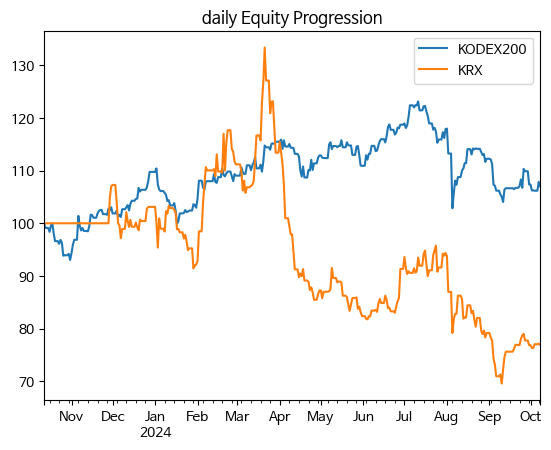

In [64]:
bm = BacktestManager(df_test, **kwargs_bm)

lags = dict(lookback=12, lag=20)
bm.benchmark_ticker(**lags)

kwargs_build = dict(
    name='KRX', select='Momentum', weigh='Equally',
    freq=40, n_assets=5, **lags
)
bm.build(**kwargs_build)
bm.run(stats_sort_by='monthly_sharpe')

### KOSPI

In [65]:
n_test = 250
df_train = df_kospi.iloc[:-n_test]
df_test = df_kospi.iloc[-n_test-250:]

kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = None, 
    days_in_year = 246,
    asset_names = assetnames_krx
)

In [66]:
bm = BacktestManager(df_train, **kwargs_bm)

938 assets from 2019-01-02 to 2023-09-22 uploaded.
running self.util_check_days_in_year to check days in a year


In [67]:
lags = dict(lookback=12, lag=20)

In [68]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [69]:
from itertools import product

params = dict(
    p_ast = [5,10,20],
    p_lback = [6,12,18],
    p_lag = [5,10,20],
    p_freq = [20,40,60]
)
p_comb = list(product(*params.values()))
kwa_list = [{'name':f'KOSPI:a{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
             'n_assets':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
            #for x in p_comb[:5]]

kwargs_build = dict(
    select='Momentum', weigh='Equally'
)
bm.build_batch(*kwa_list, **kwargs_build)

In [70]:
df_res = bm.run(stats_sort_by='monthly_sharpe', plot=False)
df_res.iloc[:, :5]

Backtesting 82 strategies: KODEX200, KOSPI:a5/lb6/lg5/f20, ... , KOSPI:a20/lb18/lg20/f60


100%|███████████████████████████████████████████████████████████████| 82/82 [04:04<00:00,  2.98s/it]


Returning stats


,KOSPI:a20/lb12/lg5/f60,KOSPI:a5/lb6/lg10/f40,KOSPI:a10/lb12/lg5/f60,KOSPI:a5/lb12/lg5/f60,KOSPI:a5/lb6/lg10/f20
start,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01
end,2023-09-22,2023-09-22,2023-09-22,2023-09-22,2023-09-22
total_return,0.885964,1.326607,0.963691,1.033966,1.071438
cagr,0.143777,0.195775,0.1536,0.16222,0.166721
calmar,0.251753,0.276598,0.213264,0.195233,0.216809
max_drawdown,-0.571101,-0.707797,-0.720234,-0.830907,-0.768978
avg_drawdown,-0.055544,-0.225787,-0.098894,-0.198083,-0.246396
avg_drawdown_days,60.75,131.909091,87.571429,137.777778,164.777778
daily_vol,0.286673,0.574135,0.380673,0.519852,0.569901
daily_sharpe,0.619503,0.600769,0.570333,0.55113,0.556442


In [72]:
df_res = bm.get_stats(sort_by='cagr')
df_res.iloc[:, :5]

,KOSPI:a5/lb6/lg10/f40,KOSPI:a5/lb6/lg10/f20,KOSPI:a5/lb12/lg5/f60,KOSPI:a5/lb6/lg5/f60,KOSPI:a10/lb12/lg5/f60
start,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01
end,2023-09-22,2023-09-22,2023-09-22,2023-09-22,2023-09-22
total_return,1.326607,1.071438,1.033966,1.003196,0.963691
cagr,0.195775,0.166721,0.16222,0.158475,0.1536
calmar,0.276598,0.216809,0.195233,0.217719,0.213264
max_drawdown,-0.707797,-0.768978,-0.830907,-0.727886,-0.720234
avg_drawdown,-0.225787,-0.246396,-0.198083,-0.332865,-0.098894
avg_drawdown_days,131.909091,164.777778,137.777778,238.5,87.571429
daily_vol,0.574135,0.569901,0.519852,0.559368,0.380673
daily_sharpe,0.600769,0.556442,0.55113,0.544759,0.570333


In [71]:
bm.portfolios

0) KODEX200
1) KOSPI:a5/lb6/lg5/f20
2) KOSPI:a5/lb6/lg5/f40
3) KOSPI:a5/lb6/lg5/f60
4) KOSPI:a5/lb6/lg10/f20
5) KOSPI:a5/lb6/lg10/f40
6) KOSPI:a5/lb6/lg10/f60
7) KOSPI:a5/lb6/lg20/f20
8) KOSPI:a5/lb6/lg20/f40
9) KOSPI:a5/lb6/lg20/f60
10) KOSPI:a5/lb12/lg5/f20
11) KOSPI:a5/lb12/lg5/f40
12) KOSPI:a5/lb12/lg5/f60
13) KOSPI:a5/lb12/lg10/f20
14) KOSPI:a5/lb12/lg10/f40
15) KOSPI:a5/lb12/lg10/f60
16) KOSPI:a5/lb12/lg20/f20
17) KOSPI:a5/lb12/lg20/f40
18) KOSPI:a5/lb12/lg20/f60
19) KOSPI:a5/lb18/lg5/f20
20) KOSPI:a5/lb18/lg5/f40
21) KOSPI:a5/lb18/lg5/f60
22) KOSPI:a5/lb18/lg10/f20
23) KOSPI:a5/lb18/lg10/f40
24) KOSPI:a5/lb18/lg10/f60
25) KOSPI:a5/lb18/lg20/f20
26) KOSPI:a5/lb18/lg20/f40
27) KOSPI:a5/lb18/lg20/f60
28) KOSPI:a10/lb6/lg5/f20
29) KOSPI:a10/lb6/lg5/f40
30) KOSPI:a10/lb6/lg5/f60
31) KOSPI:a10/lb6/lg10/f20
32) KOSPI:a10/lb6/lg10/f40
33) KOSPI:a10/lb6/lg10/f60
34) KOSPI:a10/lb6/lg20/f20
35) KOSPI:a10/lb6/lg20/f40
36) KOSPI:a10/lb6/lg20/f60
37) KOSPI:a10/lb12/lg5/f20
38) KOSPI:a10/lb12/

In [73]:
pf_list = [0, 66, 5]
bm.get_stats(pf_list, sort_by='cagr')

,KOSPI:a5/lb6/lg10/f40,KOSPI:a20/lb12/lg5/f60,KODEX200
start,2019-01-01,2019-01-01,2019-01-01
end,2023-09-22,2023-09-22,2023-09-22
total_return,1.326607,0.885964,0.176547
cagr,0.195775,0.143777,0.035025
calmar,0.276598,0.251753,0.101186
max_drawdown,-0.707797,-0.571101,-0.346143
avg_drawdown,-0.225787,-0.055544,-0.05976
avg_drawdown_days,131.909091,60.75,70.944444
daily_vol,0.574135,0.286673,0.187398
daily_sharpe,0.600769,0.619503,0.280338


#### Validation

938 assets from 2022-09-23 to 2024-10-08 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is KODEX200
Backtesting 3 strategies: KODEX200, KOSPI:a20/lb12/lg5/f60, KOSPI:a5/lb6/lg10/f40


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]

Returning stats


,KODEX200,KOSPI:a20/lb12/lg5/f60,KOSPI:a5/lb6/lg10/f40
start,2022-09-22,2022-09-22,2022-09-22
end,2024-10-08,2024-10-08,2024-10-08
total_return,0.076384,-0.109788,-0.452602
cagr,0.036646,-0.055277,-0.255196
calmar,0.22296,-0.188061,-0.365793
max_drawdown,-0.164362,-0.29393,-0.697651
avg_drawdown,-0.026246,-0.073066,-0.13587
avg_drawdown_days,13.73913,33.875,52.666667
daily_vol,0.146027,0.206482,0.432762
daily_sharpe,0.327793,-0.179938,-0.485104


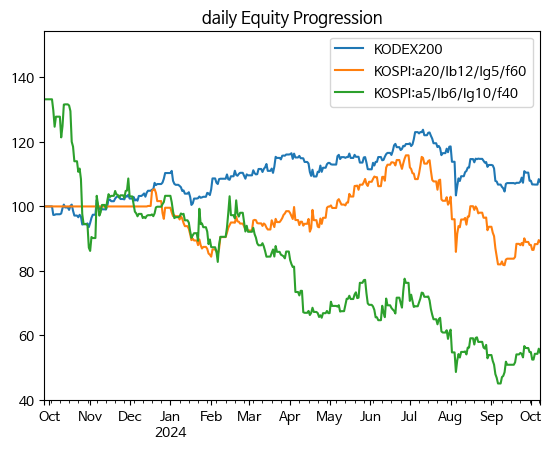

In [74]:
bm = BacktestManager(df_test, **kwargs_bm)

lags = dict(lookback=12, lag=5)
bm.benchmark_ticker(**lags)

kwa_list = [
    {'name':'KOSPI:a20/lb12/lg5/f60', 'n_assets':20, 'lookback':12, 'lag':5, 'freq':60},
    {'name':'KOSPI:a5/lb6/lg10/f40', 'n_assets':5, 'lookback':6, 'lag':10, 'freq':40}
]
kwargs_build = dict(
    select='Momentum', weigh='Equally',
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='monthly_sharpe')

### KOSPI200: Revalidation

In [75]:
n_test = 250
df = df_krx[df_krx.columns.intersection(df_k200.columns)]
df_train = df.iloc[:-n_test]
df_test = df.iloc[-n_test-250:]

In [76]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = None, 
    days_in_year = 246,
    asset_names = assetnames_krx
)

#### Parameter study

In [83]:
bm = BacktestManager(df_train, **kwargs_bm)

201 assets from 2019-01-02 to 2023-09-22 uploaded.
running self.util_check_days_in_year to check days in a year


In [84]:
from itertools import product

p_args = dict(
    p_ast = [5,10,20],
    p_lback = [6,12,18],
    p_lag = [5,10,20],
    p_freq = [20,40,60]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'K200:a{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
             'n_assets':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

kwa_list = params
kwargs_build = dict(
    select='Momentum', weigh='Equally'
)
bm.build_batch(*kwa_list, **kwargs_build)

In [85]:
df_res = bm.cross_validate(n_sample=20)

Cross-validating 81 strategies: K200:a5/lb6/lg5/f20, K200:a5/lb6/lg5/f40, ... , K200:a20/lb18/lg20/f60


100%|███████████████████████████████████████████████████████████████| 19/19 [00:30<00:00,  1.63s/it]


42.3 mins elapsed, 0.0 secs paused (0.0%)


In [86]:
f = dict(file='param_momentum_k200.csv', path=path_data)
df_cv = bm.get_cat_data(params, **f)

In [ ]:
kw = {'x':'freq', 'row':'n_assets', 'col':'lookback', 'hue':'lag'}

bm.catplot(data=df_cv, y='cagr', height=2.5, aspect=1.1, **kw)

In [34]:
file = 'param_momentum_k200.csv'
df_cv = BacktestManager.catplot(file, path=path_data)

Returning data/param_momentum_k200.csv


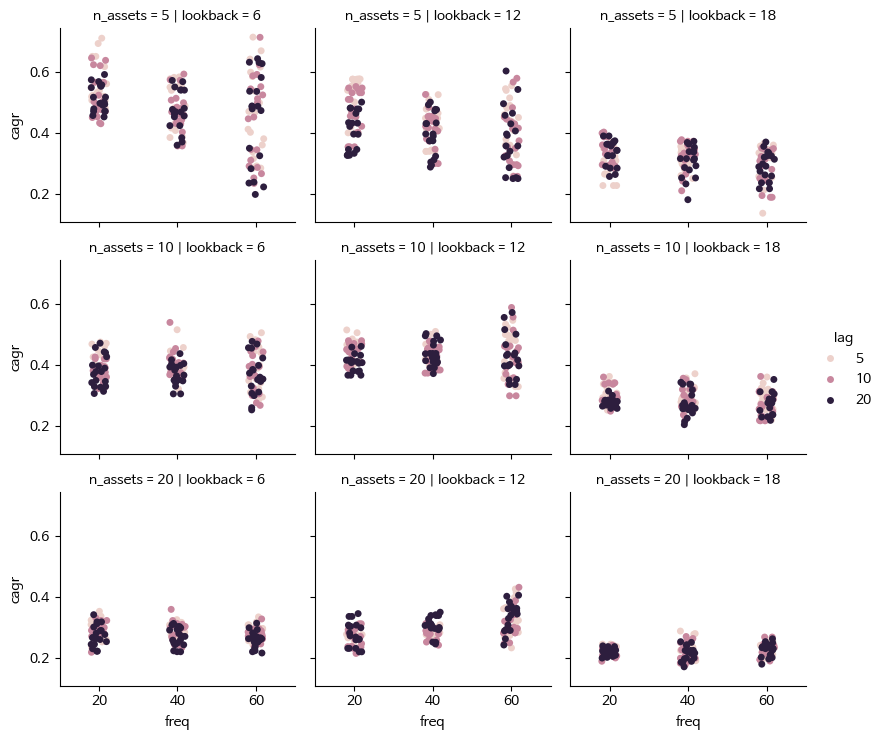

In [37]:
kw = {'x':'freq', 'row':'n_assets', 'col':'lookback', 'hue':'lag'}

_ = BacktestManager.catplot(data=df_cv, y='cagr', height=2.5, aspect=1.1, **kw)

#### Validation

2712 assets from 2022-09-23 to 2024-10-08 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is KODEX200
Backtesting 4 strategies: KODEX200, K200:a5/lb12/lg20/f20, K200:a10/lb12/lg20/f20, K200:a20/lb12/lg20/f20


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.38s/it]

Returning stats


,K200:a20/lb12/lg20/f20,KODEX200,K200:a10/lb12/lg20/f20,K200:a5/lb12/lg20/f20
start,2022-09-22,2022-09-22,2022-09-22,2022-09-22
end,2024-10-08,2024-10-08,2024-10-08,2024-10-08
total_return,0.243565,0.070514,0.013155,-0.152684
cagr,0.112471,0.033878,0.006411,-0.077816
calmar,0.423257,0.205718,0.022958,-0.219861
max_drawdown,-0.265728,-0.164682,-0.279241,-0.353933
avg_drawdown,-0.089869,-0.025863,-0.16917,-0.101525
avg_drawdown_days,30.8,13.347826,111.333333,47.142857
daily_vol,0.228332,0.14441,0.247337,0.266414
daily_sharpe,0.595759,0.310743,0.150006,-0.179966


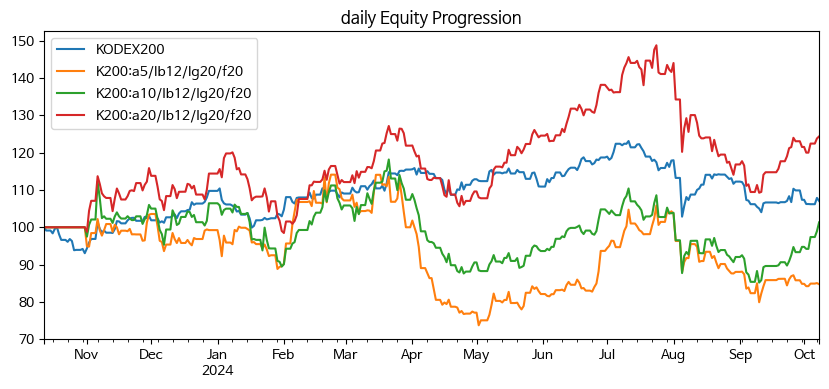

In [55]:
bm = BacktestManager(df_test, **kwargs_bm)

lags = dict(lookback=12, lag=20)
bm.benchmark_ticker(**lags)

kwa_list = [
    #{'name':'K200:a5/lb6/lg5/f20', 'n_assets':5, 'lookback':6, 'lag':5, 'freq':20},
    #{'name':'K200:a20/lb12/lg5/f60', 'n_assets':20, 'lookback':12, 'lag':5, 'freq':60},
    #{'name':'K200:a5/lb12/lg5/f20', 'n_assets':5, 'lookback':12, 'lag':5, 'freq':20},
    {'name':'K200:a5/lb12/lg20/f20', 'n_assets':5, 'lookback':12, 'lag':20, 'freq':20},
    {'name':'K200:a10/lb12/lg20/f20', 'n_assets':10, 'lookback':12, 'lag':20, 'freq':20},
    {'name':'K200:a20/lb12/lg20/f20', 'n_assets':20, 'lookback':12, 'lag':20, 'freq':20},
]

kwargs_build = dict(
    select='Momentum', weigh='Equally', run_cv=False
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(10,4))

## ETF

In [44]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 245,
    asset_names = assetnames_etf
)
bm = BacktestManager(df_etf, **kwargs_bm)

period reset: 2021-12-15 ~ 2024-10-18
6 assets from 2021-12-15 to 2024-10-18 uploaded.
running self.util_check_days_in_year to check days in a year


In [45]:
lags = dict(lookback=12, lag=5)

In [46]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [47]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='ETF:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='ETF:ERC', weigh='ERC', **kwargs_build)
bm.build(name='ETF:InvVol', weigh='InvVol', **kwargs_build)

In [48]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='ETF:Eqaully(Q)', freq = 'Q', **kwargs_build)
bm.build(name='ETF:Eqaully(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, ETF:Eqaully, ... , ETF:Eqaully(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.72it/s]

Returning stats


,ETF:ERC,ETF:Eqaully,ETF:Eqaully(M),ETF:InvVol,ETF:Eqaully(Q),KODEX200
start,2021-12-14,2021-12-14,2021-12-14,2021-12-14,2021-12-14,2021-12-14
end,2024-10-18,2024-10-18,2024-10-18,2024-10-18,2024-10-18,2024-10-18
total_return,0.239367,0.272924,0.208072,0.204659,0.20315,0.180721
cagr,0.078359,0.088535,0.068708,0.067645,0.067175,0.060139
calmar,2.033941,2.021118,1.840365,1.793541,1.817848,0.365043
max_drawdown,-0.038526,-0.043805,-0.037334,-0.037716,-0.036953,-0.164744
avg_drawdown,-0.008387,-0.00862,-0.006854,-0.00764,-0.007587,-0.03103
avg_drawdown_days,20.037037,14.702703,18.066667,20.259259,20.259259,22.730769
daily_vol,0.042952,0.050212,0.040223,0.040453,0.040248,0.146077
daily_sharpe,1.828136,1.762993,1.719393,1.684589,1.681699,0.484772


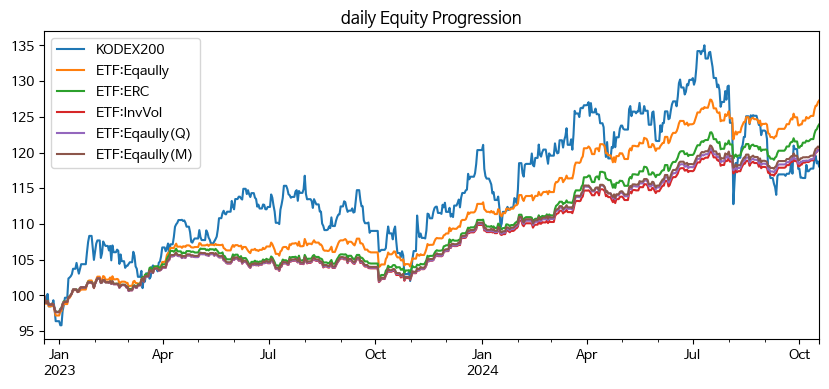

In [49]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [ ]:
df = bm.get_historical()
df_pf = df_pf.join(df[['ETF:Eqaully', 'ETF:ERC']])

## IRP

In [22]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_irp
)

lags = dict(lookback=12, lag=5)

### My portfolio

In [306]:
choice_mp = ['K55301BU6139', 'K55206C95800']
irp.get_names(choice_mp)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [307]:
bm = BacktestManager(df_irp, **kwargs_bm)

period reset: 2019-01-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [308]:
bm.benchmark_ticker()

Benchmark is KODEX200


In [309]:
choice = choice_mp

kwargs_build = dict(
    # equal weights for choice, zero weights for the rest of the assets
    weigh='Specified', weights=choice,
    select ='all'
)
bm.build(name='MP:Quarterly', freq='Q', **kwargs_build)
bm.build(name='MP:Yearly', freq='Y', **kwargs_build)

In [310]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 3 strategies: KODEX200, MP:Quarterly, MP:Yearly


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]

Returning stats


,MP:Yearly,MP:Quarterly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31
total_return,0.5097,0.509769,0.487812
cagr,0.077764,0.077773,0.074906
monthly_vol,0.103181,0.103205,0.19921
monthly_sharpe,0.779885,0.779812,0.461712
max_drawdown,-0.215629,-0.21565,-0.346184
avg_drawdown,-0.014143,-0.014135,-0.047368
avg_drawdown_days,28.912281,28.912281,68.357143


### Weight

In [311]:
bm.benchmark_ticker(name='LAG:KODEX200', **lags)

Benchmark is LAG:KODEX200


In [312]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

choice = choice_mp
bm.build(name='LAG:MP', weigh='Specified', weights=choice, **kwargs_build)

In [313]:
bm.build(name='LAG:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='LAG:ERC', weigh='ERC', **kwargs_build)
bm.build(name='LAG:InvVol', weigh='InvVol', **kwargs_build)
bm.build(name='LAG:MeanVar', weigh='MeanVar', **kwargs_build)

In [314]:
bm.portfolios

0) KODEX200
1) MP:Quarterly
2) MP:Yearly
3) LAG:KODEX200
4) LAG:MP
5) LAG:Eqaully
6) LAG:ERC
7) LAG:InvVol
8) LAG:MeanVar

In [315]:
pf_list = list(bm.portfolios.keys())[3:]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 6 strategies: LAG:KODEX200, LAG:MP, ... , LAG:MeanVar


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.60it/s]

Returning stats


,LAG:MP,LAG:Eqaully,LAG:ERC,LAG:InvVol,LAG:KODEX200,LAG:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.320584,0.355465,0.310493,0.301408,0.435671,0.218928
cagr,0.051856,0.056853,0.05039,0.049062,0.067957,0.036648
monthly_vol,0.099719,0.119832,0.105256,0.104687,0.189682,0.10127
monthly_sharpe,0.558104,0.522481,0.520792,0.510908,0.440919,0.406259
max_drawdown,-0.215628,-0.204365,-0.185794,-0.183714,-0.342786,-0.189489
avg_drawdown,-0.018684,-0.012366,-0.011598,-0.011269,-0.052,-0.014114
avg_drawdown_days,39.333333,35.45,29.744681,32.627907,74.619048,41.828571


In [316]:
kwb = {**kwargs_build, 'freq':'Q'}

bm.build(name='LAG:Quarterly', weigh='equally', **kwb)

In [317]:
pf_list = list(bm.portfolios.keys())[3:]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 7 strategies: LAG:KODEX200, LAG:MP, ... , LAG:Quarterly


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.57it/s]

Returning stats


,LAG:MP,LAG:Eqaully,LAG:Quarterly,LAG:ERC,LAG:InvVol,LAG:KODEX200,LAG:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.320584,0.355465,0.354231,0.310493,0.301408,0.435671,0.218928
cagr,0.051856,0.056853,0.056678,0.05039,0.049062,0.067957,0.036648
monthly_vol,0.099719,0.119832,0.11947,0.105256,0.104687,0.189682,0.10127
monthly_sharpe,0.558104,0.522481,0.522332,0.520792,0.510908,0.440919,0.406259
max_drawdown,-0.215628,-0.204365,-0.204063,-0.185794,-0.183714,-0.342786,-0.189489
avg_drawdown,-0.018684,-0.012366,-0.012063,-0.011598,-0.011269,-0.052,-0.014114
avg_drawdown_days,39.333333,35.45,34.463415,29.744681,32.627907,74.619048,41.828571


### Select

In [318]:
n = 4
choice = irp.performance('sharpe', 'year').index[:n].to_list()
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)

In [319]:
kwa_list = [{'name':f'SHP:Y{i}', 'weights':choice[:i]} for i in range(1,n+1)]

kwargs_build = dict(
    freq = 'Y', select = 'all', weigh='Specified'
)

bm.build_batch(*kwa_list, **kwargs_build)

In [320]:
bm.portfolios

0) KODEX200
1) MP:Quarterly
2) MP:Yearly
3) LAG:KODEX200
4) LAG:MP
5) LAG:Eqaully
6) LAG:ERC
7) LAG:InvVol
8) LAG:MeanVar
9) LAG:Quarterly
10) SHP:Y1
11) SHP:Y2
12) SHP:Y3
13) SHP:Y4

In [321]:
pf_list = [0, 2, 10, 11, 12, 13]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 6 strategies: KODEX200, MP:Yearly, ... , SHP:Y4


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.50it/s]

Returning stats


,SHP:Y1,SHP:Y2,SHP:Y4,SHP:Y3,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.618317,0.666064,0.682601,0.5097,0.487812
cagr,0.087514,0.091463,0.097249,0.099221,0.077764,0.074906
monthly_vol,0.099616,0.104922,0.122943,0.126855,0.103181,0.19921
monthly_sharpe,0.894809,0.889493,0.819295,0.811894,0.779885,0.461712
max_drawdown,-0.215077,-0.22212,-0.184672,-0.203328,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.012311,-0.009163,-0.010896,-0.014143,-0.047368
avg_drawdown_days,20.853659,20.987805,22.973333,24.942857,28.912281,68.357143


In [322]:
n = 4
choice = irp.performance('sharpe', 'month').index[:n].to_list()
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)

In [323]:
kwa_list = [{'name':f'SHP:M{i}', 'weights':choice[:i]} for i in range(1,n+1)]

bm.build_batch(*kwa_list, **kwargs_build)

In [324]:
pf_list = [0, 2, 10, 14, 15, 16, 17]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 7 strategies: KODEX200, MP:Yearly, ... , SHP:M4


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]

Returning stats


,SHP:Y1,SHP:M1,SHP:M2,SHP:M3,SHP:M4,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.586372,0.618317,0.496902,0.524563,0.5097,0.487812
cagr,0.087514,0.087514,0.091463,0.076097,0.079685,0.077764,0.074906
monthly_vol,0.099616,0.099616,0.104922,0.089114,0.094304,0.103181,0.19921
monthly_sharpe,0.894809,0.894809,0.889493,0.869994,0.862908,0.779885,0.461712
max_drawdown,-0.215077,-0.215077,-0.22212,-0.191431,-0.157305,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.0116,-0.012311,-0.010156,-0.008272,-0.014143,-0.047368
avg_drawdown_days,20.853659,20.853659,20.987805,20.890244,20.26506,28.912281,68.357143


In [325]:
choice = irp.performance('sharpe').idxmax().unique().tolist()
irp.get_names(choice)

0) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
1) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e

In [326]:
bm.build(name='SHP:Y1M1', weights=choice, **kwargs_build)

In [327]:
pf_list = [0, 2, 10, 18]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 4 strategies: KODEX200, MP:Yearly, SHP:Y1, SHP:Y1M1


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.18it/s]

Returning stats


,SHP:Y1,SHP:Y1M1,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.423583,0.5097,0.487812
cagr,0.087514,0.066316,0.077764,0.074906
monthly_vol,0.099616,0.078857,0.103181,0.19921
monthly_sharpe,0.894809,0.85584,0.779885,0.461712
max_drawdown,-0.215077,-0.172359,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.008916,-0.014143,-0.047368
avg_drawdown_days,20.853659,21.481013,28.912281,68.357143


### Candis

In [328]:
choice = choice_mp + ['K55365BT3694', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
4) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [329]:
bm.build(name='CAN1', weights=choice, **kwargs_build)

In [330]:
pf_list = [0, 2, 10, 19]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 4 strategies: KODEX200, MP:Yearly, SHP:Y1, CAN1


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.28it/s]

Returning stats


,SHP:Y1,MP:Yearly,CAN1,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.5097,0.588888,0.487812
cagr,0.087514,0.077764,0.087828,0.074906
monthly_vol,0.099616,0.103181,0.128152,0.19921
monthly_sharpe,0.894809,0.779885,0.722651,0.461712
max_drawdown,-0.215077,-0.215629,-0.213511,-0.346184
avg_drawdown,-0.0116,-0.014143,-0.011399,-0.047368
avg_drawdown_days,20.853659,28.912281,35.333333,68.357143


In [331]:
choice = choice_mp + ['K55365BT3694']
bm.build(name='CAN2', weights=choice, **kwargs_build)

In [332]:
pf_list = [0, 2, 10, 19, 20]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 5 strategies: KODEX200, MP:Yearly, SHP:Y1, CAN1, CAN2


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.31it/s]

Returning stats


,SHP:Y1,MP:Yearly,CAN2,CAN1,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.5097,0.609242,0.588888,0.487812
cagr,0.087514,0.077764,0.090348,0.087828,0.074906
monthly_vol,0.099616,0.103181,0.126804,0.128152,0.19921
monthly_sharpe,0.894809,0.779885,0.748086,0.722651,0.461712
max_drawdown,-0.215077,-0.215629,-0.208847,-0.213511,-0.346184
avg_drawdown,-0.0116,-0.014143,-0.012401,-0.011399,-0.047368
avg_drawdown_days,20.853659,28.912281,31.339623,35.333333,68.357143


#### Weight

In [362]:
choice = choice_mp + ['K55365BT3694', 'K55213C51890', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
4) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
5) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [363]:
df = df_irp[choice]
bm = BacktestManager(df, **kwargs_bm)

period reset: 2019-01-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [364]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [365]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='CAN3:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='CAN3:ERC', weigh='ERC', **kwargs_build)
bm.build(name='CAN3:InvVol', weigh='InvVol', **kwargs_build)
bm.build(name='CAN3:MeanVar', weigh='MeanVar', **kwargs_build)

In [366]:
bm.build(name='MP', weigh='Specified', weights=choice_mp, **kwargs_build)

In [367]:
choice = irp.performance('sharpe', 'year').index
bm.build(name=f'SHP:Y1', weigh='Specified', weights=choice[0], **kwargs_build)

In [368]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 7 strategies: KODEX200, CAN3:Eqaully, ... , SHP:Y1


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.84it/s]

Returning stats


,SHP:Y1,CAN3:Eqaully,CAN3:ERC,MP,CAN3:InvVol,KODEX200,CAN3:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.375277,0.410699,0.36222,0.320584,0.35347,0.435671,0.239453
cagr,0.059645,0.064555,0.057809,0.051856,0.05657,0.067957,0.0398
monthly_vol,0.096018,0.121237,0.109432,0.099719,0.110411,0.189682,0.103302
monthly_sharpe,0.652645,0.577498,0.569288,0.558104,0.554492,0.440919,0.429649
max_drawdown,-0.21507,-0.196979,-0.183427,-0.215628,-0.181566,-0.342786,-0.195187
avg_drawdown,-0.014249,-0.012469,-0.012531,-0.018684,-0.011687,-0.052,-0.014138
avg_drawdown_days,25.714286,36.205128,34.121951,39.333333,32.55814,74.619048,41.542857


#### Value1

In [53]:
choice = ['K55365BT3694', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
1) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
2) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [54]:
df_v = df_pf['K200:Momentum'].to_frame().join(df_irp[choice], how='outer')
bm = BacktestManager(df_v, **kwargs_bm)
bm.df_assets.head()

period reset: 2022-01-25 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


,KOSPI:Momentum,K55365BT3694,K55203C53681,K55234CJ0997
2022-01-25,100.000,1012.039352,1338.109236,1390.010967
2022-01-26,99.780,1012.039352,1338.109236,1390.010967
2022-01-27,96.064,1012.039352,1338.109236,1390.010967
2022-01-28,96.318,897.421767,1203.518615,1360.231095
2022-01-29,96.318,897.421767,1203.518615,1360.231095


In [55]:
bm.benchmark_ticker()

Benchmark is KODEX200


In [56]:
ew = lambda *l: [x for i,x in enumerate(bm.df_assets.columns) if i in l]

kwargs_build = dict(
    select = 'all', weigh='Specified'
)

hy = round(bm.days_in_year/2)
kwa_list = [
    {'name':f'VAL1:{f}{i}', 'freq':f if f != 'HY' else hy, 'weights':ew(0, i)} 
    for i in range(1,4) for f in ['Y', 'HY', 'Q', 'M']
]

bm.build_batch(*kwa_list, **kwargs_build)
bm.build(name='VAL:Momentum', freq='Once', weights=ew(0), **kwargs_build)

In [57]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 14 strategies: KODEX200, VAL1:Y1, ... , VAL:Momentum


100%|███████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  3.77it/s]

Returning stats


,VAL1:M1,VAL:Momentum,VAL1:Q1,VAL1:HY1,VAL1:M2,VAL1:M3,VAL1:Q2,VAL1:HY2,VAL1:Q3,VAL1:HY3,VAL1:Y1,VAL1:Y2,VAL1:Y3,KODEX200
start,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,1.816207,5.202315,1.948988,2.275473,1.743892,1.663188,1.876178,2.216583,1.817629,2.177257,1.994999,1.929399,1.892298,0.105647
cagr,0.509093,1.065356,0.53698,0.602478,0.493571,0.475954,0.521784,0.590964,0.509396,0.583205,0.546466,0.532914,0.525168,0.040723
monthly_vol,0.299109,0.543153,0.316649,0.355989,0.304777,0.283343,0.322797,0.361163,0.305477,0.350819,0.35985,0.362872,0.350884,0.201805
monthly_sharpe,1.654736,1.642873,1.637335,1.607304,1.583744,1.576551,1.569953,1.559326,1.556125,1.529182,1.493624,1.450505,1.421477,0.318938
max_drawdown,-0.174774,-0.262851,-0.177392,-0.176973,-0.165838,-0.145682,-0.16868,-0.16879,-0.16052,-0.17093,-0.192837,-0.186211,-0.197747,-0.235302
avg_drawdown,-0.038191,-0.061554,-0.038592,-0.040179,-0.039565,-0.033912,-0.042578,-0.042454,-0.03392,-0.037747,-0.049821,-0.047745,-0.047972,-0.035817
avg_drawdown_days,21.189189,17.088889,22.571429,21.944444,22.055556,19.7,22.628571,21.27027,21.297297,20.205128,21.378378,21.916667,20.410256,51.588235


#### Value2

In [63]:
choice = ['K55365BT3694']
irp.get_names(choice)

0) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2

In [64]:
df_v = df_pf['K200:Momentum'].to_frame().join(df_irp[choice], how='outer')
bm = BacktestManager(df_v, **kwargs_bm)
bm.df_assets.head()

period reset: 2022-01-25 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


,KOSPI:Momentum,K55365BT3694
2022-01-25,100.000,1012.039352
2022-01-26,99.780,1012.039352
2022-01-27,96.064,1012.039352
2022-01-28,96.318,897.421767
2022-01-29,96.318,897.421767


In [65]:
kwargs_build = dict(
    select = 'all', **lags
)

kwa_list = [
    {'name':f'VAL2:{f}', 'freq':f if f != 'HY' else hy} for f in ['Y', 'HY', 'Q', 'M']
]

bm.build_batch(*kwa_list, weigh='ERC', **kwargs_build)
bm.build(name='VAL2:Momentum', freq='Once', weights=ew(0), weigh='Specified', **kwargs_build)
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 5 strategies: VAL2:Y, VAL2:HY, VAL2:Q, VAL2:M, VAL2:Momentum


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.33it/s]


Returning stats


,VAL2:Q,VAL2:M,VAL2:HY,VAL2:Momentum,VAL2:Y
start,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,1.367166,1.274549,1.529266,4.653043,1.477626
cagr,0.408428,0.386262,0.445997,0.990624,0.43419
monthly_vol,0.191406,0.186329,0.233586,0.515736,0.261045
monthly_sharpe,1.914088,1.873641,1.717047,1.592483,1.527195
max_drawdown,-0.123468,-0.120783,-0.146581,-0.26285,-0.170256
avg_drawdown,-0.0216,-0.018723,-0.025313,-0.055505,-0.034704
avg_drawdown_days,12.294118,11.527778,13.3125,12.228571,12.969697


In [49]:
df = bm.get_historical()
df_pf = df_pf.join(df['TDF2:Eqaully'])

## HANA

In [10]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_hana
)
bm = BacktestManager(df_hana, **kwargs_bm)

period reset: 2019-10-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [11]:
lags = dict(lookback=12, lag=5)

In [12]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [13]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [14]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='HANA:InvVol(Q)', freq = 'Q', **kwargs_build)
bm.build(name='HANA:InvVol(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, HANA:Eqaully, ... , HANA:InvVol(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]

Returning stats


,HANA:InvVol,HANA:InvVol(M),HANA:InvVol(Q),HANA:ERC,HANA:Eqaully,KODEX200
start,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.153301,0.128839,0.131496,0.180167,0.155502,0.317262
cagr,0.030463,0.025826,0.026333,0.035468,0.030877,0.05969
calmar,0.531545,0.397336,0.406434,0.434394,0.317349,0.174126
max_drawdown,-0.057311,-0.064998,-0.064791,-0.081649,-0.097296,-0.342796
avg_drawdown,-0.015045,-0.009759,-0.013248,-0.024826,-0.028437,-0.039924
avg_drawdown_days,128.166667,112.125,146.166667,172.0,177.8,87.133333
daily_vol,0.032006,0.032026,0.032686,0.046101,0.049326,0.153677
daily_sharpe,0.973311,0.828929,0.828294,0.7949,0.654115,0.46194


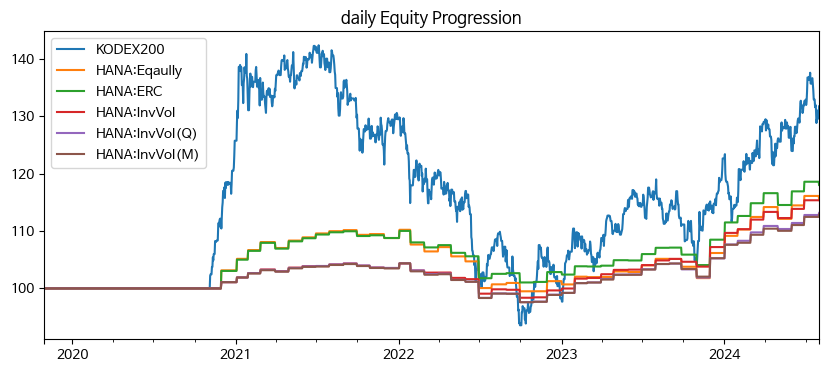

In [15]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [ ]:
df = bm.get_historical()
df_pf = df_pf.join(df['HANA:InvVol'])

## Summary

In [58]:
ae = AssetEvaluator(df_pf, 245)

ETF:Eqaully: 244
ETF:ERC: 244
TDF2:Eqaully: 246
HANA:InvVol: 246


In [59]:
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

,ETF:Eqaully,ETF:ERC,KOSPI:Momentum,HANA:InvVol,TDF2:Eqaully,KODEX200
start,2022-12-19,2022-12-19,2022-01-25,2022-01-10,2022-01-10,2022-01-10
end,2024-07-15,2024-07-15,2024-07-15,2024-06-28,2024-06-14,2024-07-15
total_return,0.268406,0.221212,6.076125,0.105528,0.048404,0.073467
cagr,0.163337,0.135605,1.208567,0.041555,0.019678,0.02864
calmar,4.442957,3.523505,4.597925,0.725071,0.120567,0.10294
max_drawdown,-0.036763,-0.038486,-0.262851,-0.057311,-0.16321,-0.278222
avg_drawdown,-0.007653,-0.007471,-0.059227,-0.026509,-0.02669,-0.053124
avg_drawdown_days,12.527778,17.384615,17.604651,214.666667,106.375,150.666667
daily_vol,0.058874,0.051632,0.467956,0.042535,0.068992,0.173314
daily_sharpe,2.673554,2.559844,1.973106,1.001981,0.324167,0.253552


# Transaction

## KOSPI200

In [24]:
kwargs = dict(
    name='KOSPI Momentum',
    file='pf_k200_momentum.csv',
    method_select='Simple', method_weigh='ERC', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)
kwargs.update(MomentumPortfolio.check_init_args('momenutm'))

pf_k200 = MomentumPortfolio(df_k200, **kwargs)

16 assets removed for shorter periods (8.0%)
185 assets from 2021-01-04 to 2024-10-23 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-08 loaded


In [25]:
pf_k200.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                          
2024-09-27 267260      HD현대일렉트릭  319500            0    8     NaN   0.1835
           003230          삼양식품  538000            0    6     NaN   0.2317
           079550        LIG넥스원  210500            0   14     NaN   0.2116
           042700         한미반도체  113000            0   21     NaN   0.1704
           012450     한화에어로스페이스  282588            9    9     NaN   0.1826
           489790  한화인더스트리얼솔루션즈   31301            9    9     NaN   0.0202
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000

In [26]:
# run after editting record file
#_ = pf_k200.update_record(save=True)

Portfolio value 14,958,500, Profit -5.3% on 2024-10-23


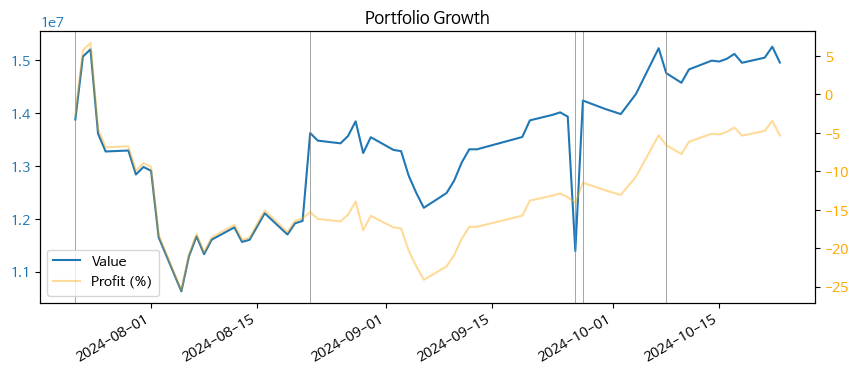

In [27]:
pf_k200.valuate()

In [28]:
pf_k200.performance(metrics=METRICS)

,KOSPI Momentum
start,2024-07-22
end,2024-10-23
total_return,0.077663
cagr,0.341449
calmar,1.133529
max_drawdown,-0.301226
avg_drawdown,-0.121266
avg_drawdown_days,29.333333
daily_vol,0.873652
daily_sharpe,0.779677


In [29]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [30]:
kwargs_trs = dict(
    n_assets = 5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_k200.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_k200.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-10-18 to 2024-10-18
Weights of assets determined by ERC.
Mean absolute error of weights: 7 %
Assets 489790 added to universe
Portfolio value 13,716,200, Profit -6.9% on 2024-10-23
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                        
2024-10-08 267260      HD현대일렉트릭  321000            0    8  0.182  0.1742
           012450     한화에어로스페이스  364500            0    9   0.21  0.2225
           079550        LIG넥스원  243500           -3   11  0.192  0.1817
           003230          삼양식품  524000            0    6  0.216  0.2133
           011790           SKC  153600           20   20    0.2  0.2084
           042700         한미반도체  108100          -21    0    NaN     0.0
           489790  한화인더스트리얼솔루션즈   39350           -9    0    NaN     0.0
2024-10-18 267260      HD현대일렉트릭  310500            0    8  0.186  0.1790
           012450     한화에어로스페이스  387500           -2    7  0.202  0.1955
           079550        LIG넥스원  253000           -1   10  0.181  0.1823
           003230          삼양식품  547000           -1    5  0.202  0.1971
           000100          유한양행  155300           22   22  0.229  0.2462
           011790           SKC  145900          -20    0    NaN       0

In [47]:
#pf_k200.performance(metrics=METRICS2)
df_pf = pf_k200.get_historical()

Assets 489790 added to universe


### Copy record to edit

In [11]:
date = '2024-09-27'
save = False

pf_k200.copy_record(date, save=save)

Transaction record to 2024-09-27 loaded
ERROR: check the date as no new transaction


### Update record

In [18]:
pf_k200.update_record()

Transaction record to 2024-09-27 loaded
Actual weights updated
Transaction file pf_k200_momentum_240927.csv updated
self.record updated


name   price  transaction  net  weight weight*
date       asset                                                         
2024-07-22 003230          삼양식품  637000            5    5   0.227  0.2234
           267260      HD현대일렉트릭  314000            9    9   0.198  0.1982
           042700         한미반도체  149000           20   20   0.205  0.2090
           000150            두산  200000           13   13   0.189  0.1824
           010120   LS ELECTRIC  222000           12   12   0.181  0.1869
2024-08-22 267260      HD현대일렉트릭  318000           -1    8   0.192  0.1856
           003230          삼양식품  509000            1    6   0.217  0.2228
           012450     한화에어로스페이스  282500           10   10   0.206  0.2061
           079550        LIG넥스원  193000           14   14   0.199  0.1971
           042700         한미반도체  123100            1   21   0.186  0.1886
           000150            두산  147600          -13    0   0.000  0.0000
           010120   LS ELECTRIC  174400          -12    0   0.000  0.0000
2024-09-26 267260      HD현대일렉트릭  335000            0    8     NaN  0.2353
           003230          삼양식품  548000            0    6     NaN  0.2887
           012450     한화에어로스페이스  282500          -10    0     NaN  0.0000
           079550        LIG넥스원  216000            0   14     NaN  0.2655
           042700         한미반도체  114200            0   21     NaN  0.2105
2024-09-27 267260      HD현대일렉트릭  319500            0    8     NaN  0.1835
           003230          삼양식품  538000            0    6     NaN  0.2317
           079550        LIG넥스원  210500            0   14     NaN  0.2116
           042700         한미반도체  113000            0   21     NaN  0.1704
           012450     한화에어로스페이스  282588            9    9     NaN  0.1826
           489790  한화인더스트리얼솔루션즈   31301            9    9     NaN  0.0202

## KRX: Simulation

In [18]:
kwargs = dict(
    name='KRX Momentum',
    file='test_pf_krx_momentum.csv',
    method_select='Simple', method_weigh='Equally', lookback=12, lag=20,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_krx,
)

pf_krx = MomentumPortfolio(df_krx, **kwargs)

616 assets removed for shorter periods (22.7%)
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-02 loaded


In [19]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

Portfolio value 6,815,572, Profit -37.2% on 2024-10-08


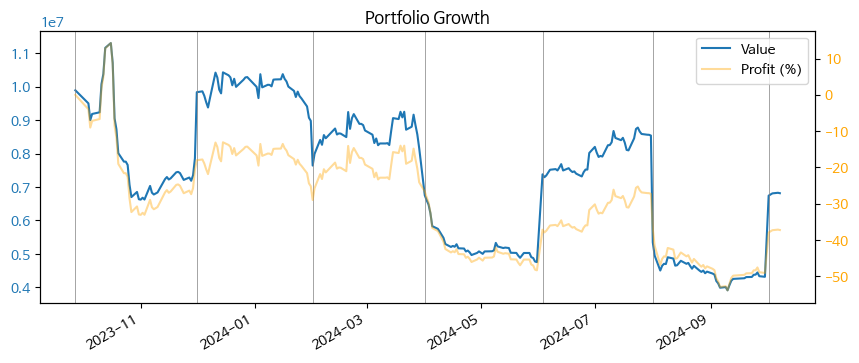

In [20]:
pf_krx.valuate()

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
kwargs_trs = dict(
    n_assets = 5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
REMINDER: Make sure lookback 12 months
5 assets selected by Total return from 2023-09-18 to 2024-09-13
Weights of assets determined by Equal weights.
Mean absolute error of weights: 0 %
Portfolio value 6,803,108, Profit -37.3% on 2024-10-08
Set save=True to save transaction record


name   price  transaction   net weight weight*
date       asset                                                   
2024-10-02 078860  엔에스이엔엠    9700           30   139    0.2     0.2
           016670     디모아    4725          130   286    0.2  0.2004
           033790      피노    9090          148   148    0.2  0.1995
           159910   스킨앤스킨     761          744  1778    0.2  0.2007
           196170    알테오젠  336000            1     4    0.2  0.1993
           089030     테크윙   36500          -21     0    NaN     0.0
2024-10-08 078860  엔에스이엔엠    9390            6   145  0.200  0.2001
           016670     디모아    4865           -6   280  0.200  0.2002
           033790      피노    9040            2   150  0.200  0.1993
           159910   스킨앤스킨     734           79  1857  0.200  0.2004
           051980  중앙첨단소재   12480          109   109  0.200  0.2000
           196170    알테오젠  369000           -4     0    NaN       0

## PER

In [31]:
df_ratio = fratios_dict['PER']

In [32]:
kwargs = dict(
    name='PER',
    file='pf_k200_per.csv',
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
    lookback=5, # days
    df_additional=df_ratio,
    method_weigh='equally',
)
kwargs.update(MomentumPortfolio.check_init_args('per'))

pf_per = MomentumPortfolio(df_k200, **kwargs)

201 assets from 2021-01-04 to 2024-10-23 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-17 loaded


In [33]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-10-17 010060   OCI홀딩스   66700           14   14     0.2   0.1892
           003030   세아제강지주  164450            6    6     0.2   0.1999
           009970  영원무역홀딩스   89000           11   11     0.2   0.1983
           016380     KG스틸    6600          154  154     0.2   0.2059
           047040     대우건설    3820          267  267     0.2   0.2066

Portfolio value 4,890,105, Profit -0.9% on 2024-10-23


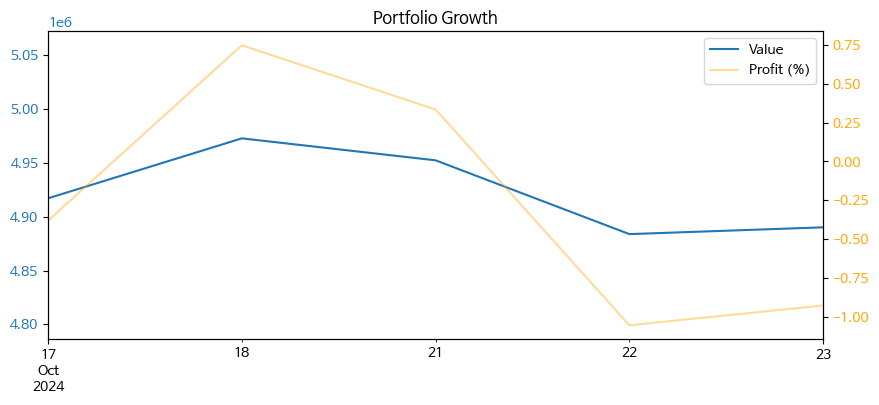

In [34]:
pf_per.valuate()

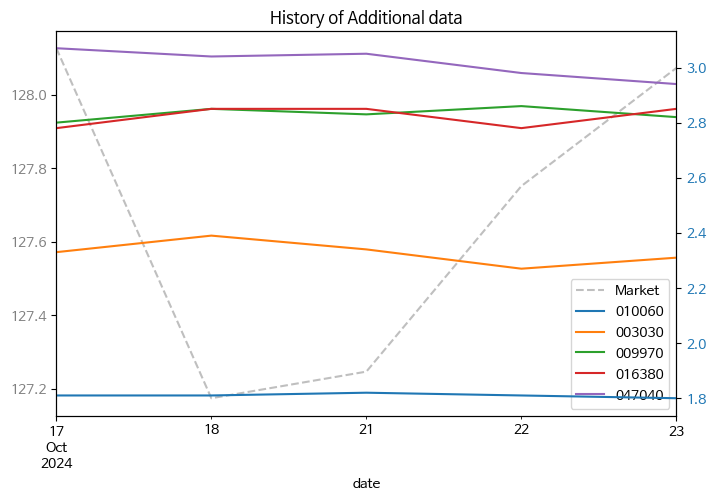

In [35]:
_ = pf_per.check_additional(plot=True)

In [36]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [37]:
kwargs_trs = dict(
    n_assets = 5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-2)

Liquidation set to None
5 assets selected by Financial Ratio from 2024-10-18 to 2024-10-23
Weights of assets determined by Equal weights.
Mean absolute error of weights: 3 %
Portfolio value 4,746,365, Profit -1.0% on 2024-10-23
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                   
2024-10-17 010060   OCI홀딩스   66700           14   14    0.2  0.1892
           003030   세아제강지주  164450            6    6    0.2  0.1999
           009970  영원무역홀딩스   89000           11   11    0.2  0.1983
           016380     KG스틸    6600          154  154    0.2  0.2059
           047040     대우건설    3820          267  267    0.2  0.2066
2024-10-23 010060   OCI홀딩스   65600            0   14  0.200  0.1935
           003030   세아제강지주  162300            0    6  0.200  0.2052
           016380     KG스틸    6680           -8  146  0.200  0.2055
           009970  영원무역홀딩스   90300           -1   10  0.200  0.1903
           047040     대우건설    3655            0  267  0.200  0.2056

In [19]:
#pf_per.update_record()

Transaction record to 2024-10-17 loaded
Actual weights updated
Transaction file pf_k200_per_241017.csv updated
self.record updated


name   price  transaction  net  weight weight*
date       asset                                                    
2024-10-17 010060   OCI홀딩스   66700           14   14     0.2  0.1892
           003030   세아제강지주  164450            6    6     0.2  0.1999
           009970  영원무역홀딩스   89000           11   11     0.2  0.1983
           016380     KG스틸    6600          154  154     0.2  0.2059
           047040     대우건설    3820          267  267     0.2  0.2066

## ETF

In [38]:
kwargs = dict(
    name='ETF6',
    file='pf_etf_static.csv',
    method_weigh='Equally', lookback=12, lag=5,
    path=path_tran,
    days_in_year=245,
    asset_names=assetnames_etf,
)

pf_etf = StaticPortfolio(df_etf, **kwargs)

period reset: 2021-12-15 ~ 2024-10-23
6 assets from 2021-12-15 to 2024-10-23 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-18 loaded


Portfolio value 9,987,100, Profit 1.7% on 2024-10-23


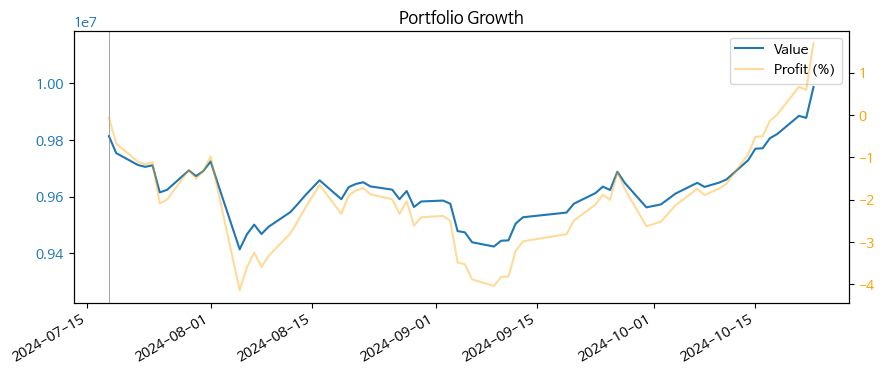

In [39]:
pf_etf.valuate()

In [40]:
pf_etf.performance(metrics=METRICS)

,ETF6
start,2024-07-18
end,2024-10-23
total_return,0.017693
cagr,0.068269
calmar,1.673574
max_drawdown,-0.040792
avg_drawdown,-0.020759
avg_drawdown_days,46.0
daily_vol,0.085744
daily_sharpe,0.873894


In [41]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [42]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_etf.transaction_pipeline(**kwargs)
pf_etf.view_record(-2)

Liquidation set to None
6 assets from 2023-10-18 to 2024-10-18 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 1 %
Portfolio value 9,902,075, Profit 1.5% on 2024-10-23
Set save=True to save transaction record


name   price  transaction  net weight  \
date       asset                                                           
2024-07-18 069500             KODEX 200   39085           42   42  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14  0.167   
           148070          KOSEF 국고채10년  114910           14   14  0.167   
           379800      KODEX 미국S&P500TR   17625           94   94  0.167   
           411060            ACE KRX금현물   15715          106  106  0.167   
           284430        KODEX 200미국채혼합   13440          124  124  0.167   
2024-10-18 069500             KODEX 200   34820            5   47  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114180            0   14  0.167   
           148070          KOSEF 국고채10년  116225            0   14  0.167   
           379800      KODEX 미국S&P500TR   18255           -5   89  0.167   
           411060            ACE KRX금현물   17195          -11   95  0.167   
           284430        KODEX 200미국채혼합   12855            3  127  0.167   

                  weight*  
date       asset           
2024-07-18 069500   0.167  
           273130   0.161  
           148070   0.164  
           379800   0.169  
           411060    0.17  
           284430    0.17  
2024-10-18 069500  0.1678  
           273130  0.1639  
           148070  0.1668  
           379800  0.1666  
           411060  0.1675  
           284430  0.1674

In [ ]:
df_pf = df_pf.to_frame().join(pf_etf.get_historical(), how='outer')

## LIQ

In [9]:
kwargs = dict(
    name='Liquidating',
    file='pf_liq_static.csv',
    method_weigh='Equally',
    path=path_tran,
    days_in_year=244,
    asset_names=assetnames_liq,
)

pf_liq = StaticPortfolio(df_liq, **kwargs)

period reset: 2023-06-16 ~ 2024-10-23
24 assets from 2023-06-16 to 2024-10-23 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-01-03 loaded


Portfolio value 3,337,463, Profit -49.8% on 2024-10-23


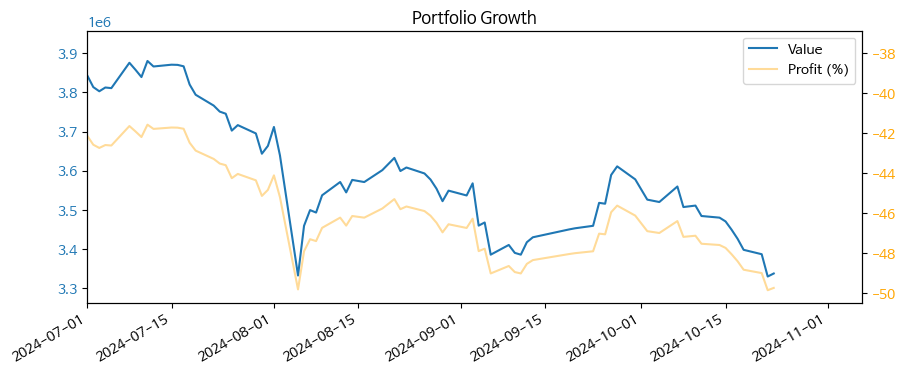

In [10]:
#date=None
date='2024-07-01'
pf_liq.valuate(start_date=date)

In [11]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## IRP

In [47]:
choice = ['K55301BU6139', 'K55206C95800']

In [59]:
kwargs = dict(
    name='TDF2',
    file='pf_tdf_static.csv',
    lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_irp,
)

pf_irp = StaticPortfolio(df_irp[choice], **kwargs)
pf_irp.record

period reset: 2018-07-26 ~ 2024-08-25
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-06-19 loaded


name  price  \
date       asset                                                            
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   

                         transaction   net  weight  weight*  
date       asset                                             
2024-06-19 K55301BU6139         3132  3132     0.5      0.5  
           K55206C95800         3657  3657     0.5      0.5

Portfolio value 9,985,217, Profit -0.1% on 2024-08-25


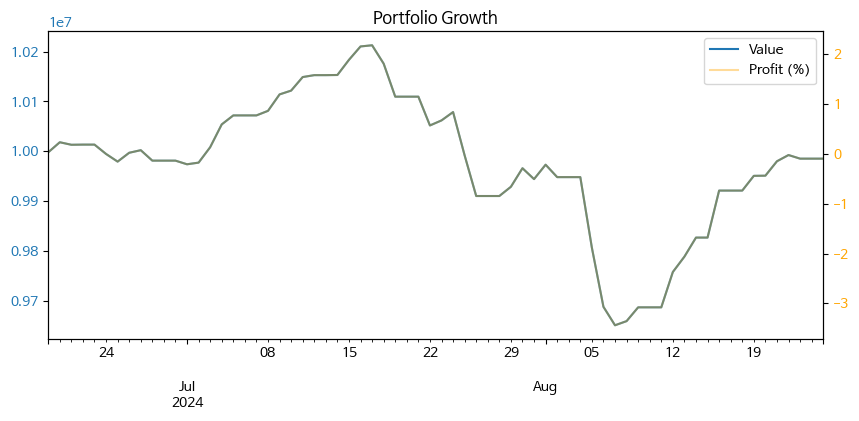

In [60]:
pf_irp.valuate()

In [61]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [63]:
kwargs = dict(
    method_weigh = 'Equally', 
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_irp.transaction_pipeline(**kwargs)
pf_irp.view_record()

Liquidation set to None
2 assets from 2023-08-20 to 2024-08-20 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 0 %
Portfolio value 9,983,440, Profit -0.1% on 2024-08-25
Set save=True to save transaction record


name  price  \
date       asset                                                            
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   
2024-08-25 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1576   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1379   

                         transaction   net weight weight*  
date       asset                                           
2024-06-19 K55301BU6139         3132  3132    0.5     0.5  
           K55206C95800         3657  3657    0.5     0.5  
2024-08-25 K55301BU6139           33  3165  0.500  0.4999  
           K55206C95800          -39  3618  0.500  0.5001

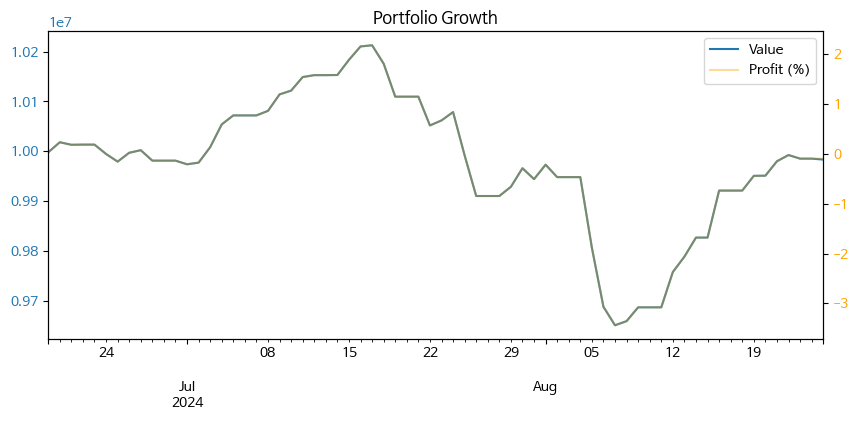

In [64]:
pf_irp.plot()

In [65]:
pf_irp.performance(metrics=METRICS)

,TDF2
start,2024-06-19
end,2024-08-25
total_return,-0.001445
cagr,-0.007851
calmar,-0.142693
max_drawdown,-0.055021
avg_drawdown,-0.029718
avg_drawdown_days,25.5
daily_vol,0.059299
daily_sharpe,-0.062399


In [34]:
df_pf = df_pf.join(pf_irp.get_historical(), how='outer')
df_pf.tail()

,KOSPI Momentum,ETF6,TDF2
2024-07-18,NaN,9788950.0,1.020846e+07
2024-07-19,14255000.0,9729050.0,1.014225e+07
2024-07-20,NaN,NaN,1.014225e+07
2024-07-21,NaN,NaN,1.014225e+07
2024-07-22,13880500.0,9717710.0,1.004848e+07


## HANA

In [66]:
kwargs = dict(
    name='HANA4',
    file='pf_hana_static.csv',
    method_weigh='InvVol', lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_hana,
)

pf_hana = StaticPortfolio(df_hana, **kwargs)

period reset: 2019-10-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
Transaction record to 2024-07-31 loaded


In [67]:
pf_hana.valuate()

Portfolio value 9,997,329, Profit 0.1% on 2024-07-31
ERROR: need more data to plot


In [28]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [68]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 assets from 2023-07-31 to 2024-06-28 prepared for weight analysis
ERROR: check the date as no new transaction
Portfolio value 9,997,329, Profit 0.1% on 2024-07-31


name  price  \
date       asset                                                        
2024-07-31 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1151   

                         transaction   net  weight  weight*  
date       asset                                             
2024-07-31 KR5101888398         4699  4699   0.502    0.502  
           KR5236AS4826         1920  1920   0.242    0.242  
           KR5370AP9956         1448  1448   0.186    0.186  
           K55306CV9946          602   602   0.069    0.069

In [69]:
pf_hana.plot()

ERROR: need more data to plot


In [70]:
pf_hana.performance(metrics=METRICS)

ERROR: Need more data to measure


In [41]:
df_pf = df_pf.join(pf_hana.get_historical(), how='outer')

## Summary

In [42]:
ae = AssetEvaluator(df_pf, 242)
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

KOSPI Momentum: 0
ETF6: 0
TDF2: 0
HANA4: 0


,KOSPI Momentum,ETF6,TDF2,HANA4
start,2024-07-19,2024-07-17,2024-06-18,2024-06-28
end,2024-07-22,2024-07-22,2024-07-22,2024-06-28
total_return,-0.026271,-0.01041,0.005385,NaN
cagr,-0.960888,-0.534419,0.059393,NaN
calmar,-36.575313,-51.334876,3.090541,NaN
max_drawdown,-0.026271,-0.01041,-0.019218,NaN
avg_drawdown,-0.026271,-0.01041,-0.011809,NaN
avg_drawdown_days,0.0,4.0,8.5,NaN
daily_vol,NaN,0.03957,0.042799,NaN
daily_sharpe,NaN,-22.163551,0.950972,NaN


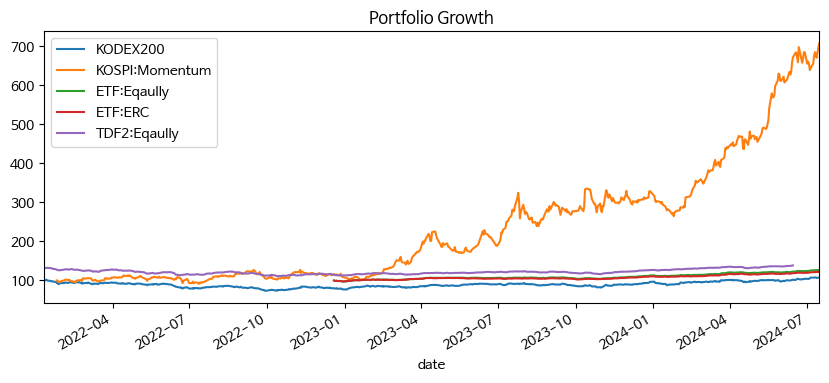

In [34]:
_ = ae.plot_historical()

# Testing